**Latar Belakang**

Sebuah perusahaan asuransi perjalanan internasional menghadapi tantangan besar dalam menangani klaim pelanggan yang diajukan selama perjalanan internasional. Setiap tahunnya, puluhan ribu nasabah membeli polis untuk melindungi perjalanan mereka dari risiko seperti pembatalan, kecelakaan, atau kehilangan barang. Namun hanya sebagian kecil klaim yang benar-benar layak diproses, sementara sebagian besar tidak memenuhi kriteria kelayakan.

hal ini menimbulkan tantangan besar seperti:
- Beban kerja tinggi: verifikasi manual memakan waktu dan tenaga.
- Kualitas layanan turun: keterlambatan dalam menyetujui klaim memicu ketidakpuasan.
- Risiko finansial: pembayaran klaim tidak valid berdampak langsung pada keuangan perusahaan.
- Kurangnya akurasi: sulit mengidentifikasi klaim valid dari ribuan pengajuan.


**Problem Statement**

Bagaimana membangun model prediktif yang dapat membantu mengidentifikasi mana klaim asuransi perjalanan yang layak disetujui atau tidak dengan cepat dan efisien berdasarkan informasi dari data historis polis.



**Goals**
- Otomatisasi penilaian klaim untuk menghemat waktu dan biaya operasional.
- Meningkatkan akurasi prediksi klaim valid berdasarkan data historis.
- Mengurangi risiko kerugian dari pembayaran klaim tidak valid.
- Memberikan pelayanan lebih cepat dan adil kepada pelanggan.


**Analytical Approach**

- Exploratory Data Analysis (EDA): Menjelajahi distribusi data, deteksi imbalance, dan pola klaim.
- Data Preprocessing: Mempersiapkan data dengan baik agar bisa digunakan untuk pemodelan.
- Pemodelan Machine Learning : Membangun beberapa model klasifikasi (Logistic Regression, Random Forest, XGBoost, LGBM) dan mengevaluasi performanya dengan cross-validation dan ROC AUC.
- Feature Importance & Interpretasi: Menggali fitur mana yang paling banyak berkontribusi terhadap keputusan klaim.
- Exporting Best Model & Rekomendasi: Menyimpan model terbaik dan memberikan strategi implementasi.



**About Dataset**

Fitur:
- Agency Type: Jenis agensi asuransi perjalanan.
- Distribution Channel: Saluran agensi asuransi perjalanan.
- Product Name: Nama produk asuransi perjalanan.
- Gender: Jenis kelamin.
- Duration: Durasi perjalanan.
- Destination: Destinasi/Tujuan perjalanan
- Net Sales: Jumlah penjualan polis asuransi perjalanan.
- Commission (in value): Komisi yang diterima untuk agensi asuransi perjalanan.
- Age: Usia.

Target:
- Claim: Status Klaim.

Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# split
from sklearn.model_selection import train_test_split

# column transformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Preprocessing

# encoding
from sklearn.preprocessing import OneHotEncoder
from category_encoders import OrdinalEncoder
from category_encoders import BinaryEncoder 

# scaling
from sklearn.preprocessing import RobustScaler

# Resampling
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.pipeline import Pipeline

# Cross Validation
from sklearn.model_selection import StratifiedKFold,cross_val_score, cross_validate

# model Classification
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.ensemble import RandomForestClassifier         # Untuk Random Forest
from xgboost import XGBClassifier                           # Untuk XGBoost
import lightgbm as lgb      
import pickle

# scoring classification
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, fbeta_score, make_scorer, precision_recall_curve, roc_auc_score, classification_report, confusion_matrix, RocCurveDisplay

## 1. Load Dataset & EDA

In [2]:
df = pd.read_csv('data_travel_insurance.csv')
df

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.00,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,4,MALAYSIA,10.0,0.00,33,No
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.70,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,20,UNITED STATES,112.0,0.00,59,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.00,28,No
...,...,...,...,...,...,...,...,...,...,...,...
44323,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,14,CHINA,30.0,0.00,36,Yes
44324,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,NaN,17,AUSTRALIA,79.2,47.52,47,No
44325,TST,Travel Agency,Offline,Travel Cruise Protect,M,64,THAILAND,30.0,10.50,50,No
44326,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,51,CHINA,36.0,0.00,36,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44328 entries, 0 to 44327
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                44328 non-null  object 
 1   Agency Type           44328 non-null  object 
 2   Distribution Channel  44328 non-null  object 
 3   Product Name          44328 non-null  object 
 4   Gender                12681 non-null  object 
 5   Duration              44328 non-null  int64  
 6   Destination           44328 non-null  object 
 7   Net Sales             44328 non-null  float64
 8   Commision (in value)  44328 non-null  float64
 9   Age                   44328 non-null  int64  
 10  Claim                 44328 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 3.7+ MB


### **Data Cleaning**

In [4]:
# Mengecek jumlah NaN
df.isna().sum()

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Gender                  31647
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Age                         0
Claim                       0
dtype: int64

In [5]:
# Mengecek jumlah data duplikat
df.duplicated().sum()

np.int64(4667)

In [6]:
# Menghapus data duplikat
df.drop_duplicates(inplace=True)

In [7]:
# Mengecek jumlah data duplikat
df.duplicated().sum()

np.int64(0)

In [8]:
#Ubah value dari kolom 'Claim' (target) menjadi nilai 0 dan 1
df['Claim'] = np.where(df['Claim']=='Yes', 1, 0)

Dari pengecekan Missing values yang telah dilakukan di atas, bahwa kolom 'Gender' terdapat value yang kosong sebanyak 31647. kemudian kita akan lihat korelasi nya dengan kolom 'Age'.

In [9]:
pd.DataFrame({
    'age_range':['10-19', '20-29', '30-39', '40-49', '50+'],
    'missing_values':[
        df[(df['Age']>=10) & (df['Age']<20)]['Gender'].isna().sum(),
        df[(df['Age']>=20) & (df['Age']<30)]['Gender'].isna().sum(),
        df[(df['Age']>=30) & (df['Age']<40)]['Gender'].isna().sum(),
        df[(df['Age']>=40) & (df['Age']<50)]['Gender'].isna().sum(),
        df[(df['Age']>=50)]['Gender'].isna().sum(),
    ]
})

,age_range,missing_values
0,10-19,26
1,20-29,2692
2,30-39,18343
3,40-49,3641
4,50+,2965


Dari Dataframe diatas bisa dikatakan bahwa mayoritas usia 30-39 tidak mencantumkan Gender mereka sedangkan untuk mengclaim sebuah asuransi harus mengisi biodata secara lengkap. maka untuk kolom Gender akan di hapus karena tidak sesuai dengan peraturan yang berlaku untuk mengclaim asuransi tersebut dan supaya model yang digunakan dapat memprediksi dengan akurat

In [10]:
#Menghapus data dengan nilai kosong (Missing Values) dan menghapus kolom Gender
df = df.dropna().reset_index(drop=True)
df = df.drop(['Gender'], axis=1)
df

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,216.0,54.00,57,0
1,JZI,Airlines,Online,Basic Plan,19,INDIA,22.0,7.70,26,0
2,C2B,Airlines,Online,Bronze Plan,8,SINGAPORE,16.0,4.00,28,0
3,JZI,Airlines,Online,Basic Plan,4,THAILAND,22.0,7.70,39,0
4,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,216.0,54.00,27,0
...,...,...,...,...,...,...,...,...,...,...
11989,LWC,Travel Agency,Online,Single Trip Travel Protect Silver,11,CHINA,49.5,32.18,84,0
11990,JZI,Airlines,Online,Basic Plan,13,THAILAND,22.0,7.70,42,0
11991,JZI,Airlines,Online,Value Plan,11,UNITED KINGDOM,87.0,30.45,65,0
11992,TST,Travel Agency,Offline,Travel Cruise Protect,94,THAILAND,30.0,10.50,0,0


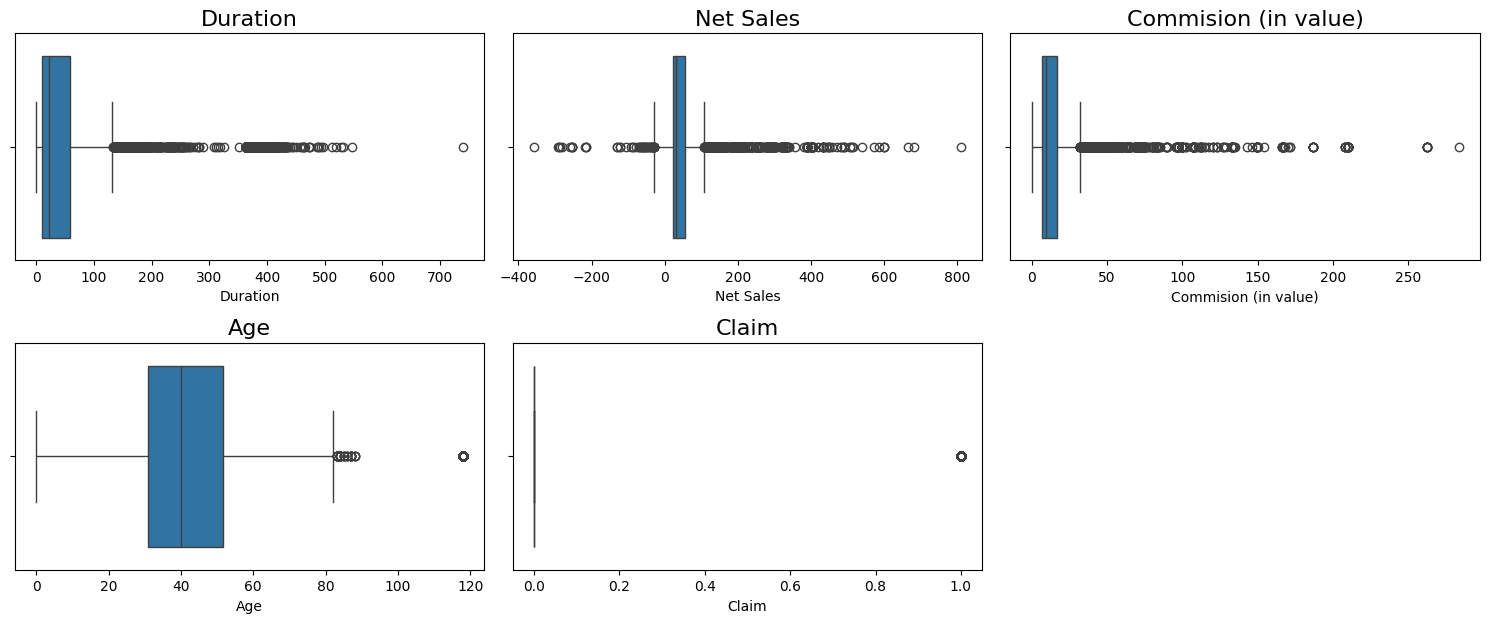

In [11]:
# Mengecek Outlier
num_feature = df.describe().columns
plt.figure(figsize=(15, 9), facecolor='white')
plotnumber = 1
    
for feature in num_feature:
    ax = plt.subplot(3,3, plotnumber)
    sns.boxplot(x=feature, data=df);
    plt.title(feature, fontsize=16)
    plt.tight_layout()
    plotnumber = plotnumber + 1

In [12]:
df.describe()

,Duration,Net Sales,Commision (in value),Age,Claim
count,11994.000000,11994.000000,11994.000000,11994.000000,11994.000000
mean,69.158413,57.672973,18.517610,43.753960,0.039436
std,112.148411,74.065644,25.046143,19.081596,0.194639
min,0.000000,-357.500000,0.000000,0.000000,0.000000
25%,10.000000,22.000000,6.750000,31.000000,0.000000
50%,22.000000,30.000000,9.750000,40.000000,0.000000
75%,59.000000,56.000000,16.800000,51.750000,0.000000
max,740.000000,810.000000,283.500000,118.000000,1.000000


In [13]:
df[df['Claim']==0].describe()

,Duration,Net Sales,Commision (in value),Age,Claim
count,11521.000000,11521.000000,11521.000000,11521.000000,11521.0
mean,66.595782,55.553380,18.004676,43.956080,0.0
std,109.120544,71.779778,24.481269,19.205115,0.0
min,0.000000,-357.500000,0.000000,0.000000,0.0
25%,10.000000,22.000000,6.750000,31.000000,0.0
50%,22.000000,30.000000,9.750000,40.000000,0.0
75%,57.000000,53.500000,16.250000,52.000000,0.0
max,740.000000,810.000000,283.500000,118.000000,0.0


In [14]:
df[df['Claim']==1].describe()

,Duration,Net Sales,Commision (in value),Age,Claim
count,473.000000,473.000000,473.000000,473.000000,473.0
mean,131.577167,109.300529,31.011290,38.830867,1.0
std,157.769271,104.179824,33.891239,14.972324,0.0
min,2.000000,13.500000,0.000000,14.000000,1.0
25%,13.000000,29.000000,7.470000,29.000000,1.0
50%,35.000000,56.500000,15.500000,35.000000,1.0
75%,365.000000,216.000000,54.000000,46.000000,1.0
max,431.000000,507.000000,210.210000,118.000000,1.0


Terlihat bahwa sebagian besar data outlier berasal dari calon pelanggan asuransi perjalanan yang tidak mengajukan klaim. Meskipun demikian, proses penghapusan outlier tidak semata-mata didasarkan pada nilai yang berada di luar batas kuartil dan median, tetapi juga mempertimbangkan kriteria umum yang ditetapkan oleh sebagian besar agen asuransi, seperti batas maksimal durasi perjalanan, besaran komisi, serta usia calon peserta asuransi.

maka kita dapat asumsikan durasi perjalan yang lebih dari 12 bulan/365 hari akan dihapus karena secara umum penyedia layanan asuransi perjalan hanya berlaku selama 12 bulan/365 hari. 

Selain durasi perjalanan tadi, maka kita asumsikan juga batas usia klaim yaitu dengan usia maksimal 90 tahun. lebih dari usia 90 maka asuransi tidak dapat di klaim.

In [15]:
df = df[(df['Duration'] < 365) & (df['Age'] < 90)]

In [16]:
df

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
1,JZI,Airlines,Online,Basic Plan,19,INDIA,22.0,7.70,26,0
2,C2B,Airlines,Online,Bronze Plan,8,SINGAPORE,16.0,4.00,28,0
3,JZI,Airlines,Online,Basic Plan,4,THAILAND,22.0,7.70,39,0
5,JZI,Airlines,Online,Basic Plan,103,"KOREA, REPUBLIC OF",26.0,9.10,48,0
7,JZI,Airlines,Online,Basic Plan,12,VIET NAM,30.0,10.50,35,1
...,...,...,...,...,...,...,...,...,...,...
11989,LWC,Travel Agency,Online,Single Trip Travel Protect Silver,11,CHINA,49.5,32.18,84,0
11990,JZI,Airlines,Online,Basic Plan,13,THAILAND,22.0,7.70,42,0
11991,JZI,Airlines,Online,Value Plan,11,UNITED KINGDOM,87.0,30.45,65,0
11992,TST,Travel Agency,Offline,Travel Cruise Protect,94,THAILAND,30.0,10.50,0,0


### **Data Analisis**

In [17]:
df_ori = pd.read_csv('data_travel_insurance.csv')


In [18]:
df.describe()

,Duration,Net Sales,Commision (in value),Age,Claim
count,10508.000000,10508.000000,10508.000000,10508.000000,10508.000000
mean,37.736962,39.734581,12.746129,41.309478,0.032832
std,56.077374,44.392665,13.616469,13.820249,0.178206
min,0.000000,-357.500000,0.000000,0.000000,0.000000
25%,9.000000,22.000000,6.300000,30.000000,0.000000
50%,19.000000,29.000000,9.100000,39.000000,0.000000
75%,42.000000,42.000000,13.650000,50.000000,0.000000
max,364.000000,682.000000,262.760000,88.000000,1.000000


In [19]:
df_ori.describe()

,Duration,Net Sales,Commision (in value),Age
count,44328.000000,44328.000000,44328.000000,44328.000000
mean,49.424292,40.550948,9.707692,39.925600
std,109.153961,48.661970,19.625637,13.954926
min,-1.000000,-357.500000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000
50%,22.000000,26.500000,0.000000,36.000000
75%,53.000000,48.000000,11.550000,43.000000
max,4881.000000,810.000000,283.500000,118.000000


In [20]:
df['Claim'].value_counts()

Claim
0    10163
1      345
Name: count, dtype: int64

In [21]:
df_ori['Claim'].value_counts()

Claim
No     43651
Yes      677
Name: count, dtype: int64

In [22]:
df['Claim'].value_counts()/len(df['Claim']) * 100

Claim
0    96.716787
1     3.283213
Name: count, dtype: float64

In [23]:
df_ori['Claim'].value_counts()/len(df_ori['Claim']) * 100

Claim
No     98.472749
Yes     1.527251
Name: count, dtype: float64

dari hasil analisis di atas dataset yang sudah di handle missing values, outlier dan duplicate, 96% pelanggan tidak mengajukan klaim sedangkan untuk dataset yang asli sebesar 98% pelanggan tidak mengajukan klaim yang dimana ini mengalami penurunan sebesar 2%.

In [24]:
# Pastikan import display dari IPython
from IPython.display import display

# Perbaikan nama kolom 'Commision'
columns_to_exclude = ['Duration', 'Net Sales', 'Commision (in value)', 'Age']

# Loop dan analisis distribusi klaim berdasarkan fitur kategorikal
for col in df.drop(columns=columns_to_exclude).columns:
    analysis_df = (
        df.groupby([col, 'Claim']).size()
        .div(df.groupby(col).size(), level=0)
        .unstack(fill_value=0)
    )
    print(f"\nDistribusi Klaim berdasarkan {col}:\n")
    display(analysis_df.sort_values(by=1.0, ascending=False))



Distribusi Klaim berdasarkan Agency:



Claim,0,1
Agency,,
C2B,0.935272,0.064728
LWC,0.948553,0.051447
KML,0.979920,0.020080
CSR,0.985294,0.014706
CBH,0.985507,0.014493
CCR,0.989583,0.010417
TST,0.994135,0.005865
JZI,0.994810,0.005190
RAB,0.996923,0.003077



Distribusi Klaim berdasarkan Agency Type:



Claim,0,1
Agency Type,,
Airlines,0.965798,0.034202
Travel Agency,0.977985,0.022015



Distribusi Klaim berdasarkan Distribution Channel:



Claim,0,1
Distribution Channel,,
Online,0.965775,0.034225
Offline,0.990050,0.009950



Distribusi Klaim berdasarkan Product Name:



Claim,0,1
Product Name,,
Annual Silver Plan,0.865979,0.134021
Single Trip Travel Protect Platinum,0.893617,0.106383
Annual Gold Plan,0.904762,0.095238
Silver Plan,0.928191,0.071809
Bronze Plan,0.940700,0.059300
Single Trip Travel Protect Gold,0.947761,0.052239
Gold Plan,0.949153,0.050847
Single Trip Travel Protect Silver,0.965517,0.034483
Premier Plan,0.981132,0.018868



Distribusi Klaim berdasarkan Destination:



Claim,0,1
Destination,,
SINGAPORE,0.935792,0.064208
CANADA,0.941176,0.058824
NEW ZEALAND,0.954545,0.045455
UNITED STATES,0.965909,0.034091
NETHERLANDS,0.970149,0.029851
...,...,...
SPAIN,1.000000,0.000000
SOUTH AFRICA,1.000000,0.000000
TURKEY,1.000000,0.000000



Distribusi Klaim berdasarkan Claim:



Claim,0,1
Claim,,
1,0.0,1.0
0,1.0,0.0


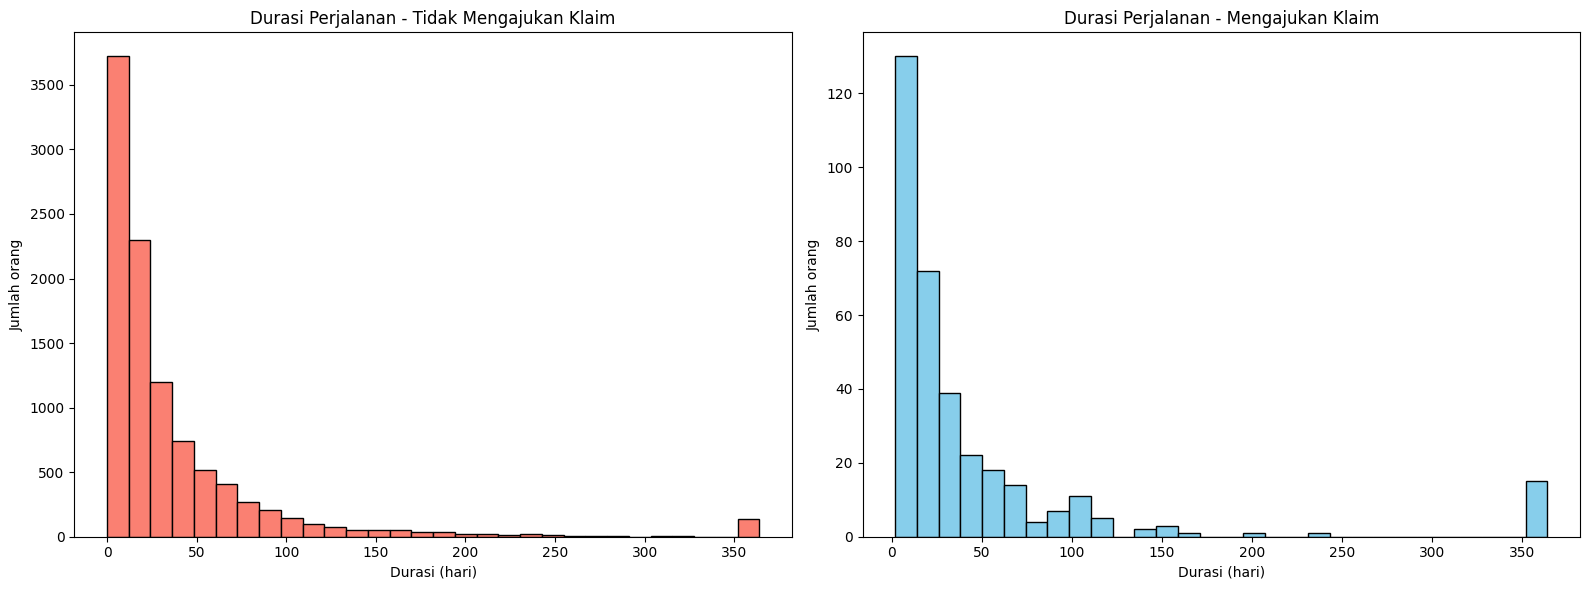

In [25]:
plt.figure(figsize=(16, 6))

# Plot untuk orang yang tidak mengajukan klaim
plt.subplot(1, 2, 1)
plt.hist(df[df['Claim'] == 0]['Duration'], bins=30, color='salmon', edgecolor='black')
plt.xlabel('Durasi (hari)')
plt.ylabel('Jumlah orang')
plt.title('Durasi Perjalanan - Tidak Mengajukan Klaim')

# Plot untuk orang yang mengajukan klaim
plt.subplot(1, 2, 2)
plt.hist(df[df['Claim'] == 1]['Duration'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Durasi (hari)')
plt.ylabel('Jumlah orang')
plt.title('Durasi Perjalanan - Mengajukan Klaim')

plt.tight_layout()
plt.show()

**Kesimpulan EDA**
1. Agency yang paling banyak melakukan klaim adalah C2B, sedangkan Agency yang tidak melakukan klaim sama sekali diantaranya Agency ART, ADM, CWT, dan TTW.
2. Airlines menjadi tipe angensi yang paling banyak klaim dibandingkan Travel Agency.
3. Klaim paling banyak dilakukan oleh Pelanggan Online dibandingkan Offline.
4. Top 5 Produk yang paling banyak mengajukan klaim diantaranya Annual Silver Plan, Single Trip Travel Protect Platinum, Annual Gold Plan, Silver Plan, Bronze Plan.
5. Top 5 Destinasi yang mengajukan paling banyak mengajukan klaim diantaranya SINGAPORE, CANADA, NEW ZEALAND, UNITED STATES, NETHERLANDS.

## 2. Data Preprocessing

In [26]:
df.head()


,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
1,JZI,Airlines,Online,Basic Plan,19,INDIA,22.0,7.7,26,0
2,C2B,Airlines,Online,Bronze Plan,8,SINGAPORE,16.0,4.0,28,0
3,JZI,Airlines,Online,Basic Plan,4,THAILAND,22.0,7.7,39,0
5,JZI,Airlines,Online,Basic Plan,103,"KOREA, REPUBLIC OF",26.0,9.1,48,0
7,JZI,Airlines,Online,Basic Plan,12,VIET NAM,30.0,10.5,35,1


Fitur Encoding: 
- **Robust Scaler**: Duration, Net Sales, Commision (in value).
- **Onehot Encoder**: Agency Type, Distribution Channel.
- **Binary Encoder**: Agency, Product Name, Destination.

In [27]:
# Encoding
transformer = ColumnTransformer([
    ('robust', RobustScaler(), ['Duration', 'Net Sales', 'Commision (in value)']),
    ('onehot', OneHotEncoder(drop='first', sparse_output=False), ['Agency Type', 'Distribution Channel']),
    ('binary', BinaryEncoder(), ['Agency', 'Product Name', 'Destination'])
], remainder='passthrough')

In [28]:
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('robust', RobustScaler(),
                                 ['Duration', 'Net Sales',
                                  'Commision (in value)']),
                                ('onehot',
                                 OneHotEncoder(drop='first',
                                               sparse_output=False),
                                 ['Agency Type', 'Distribution Channel']),
                                ('binary', BinaryEncoder(),
                                 ['Agency', 'Product Name', 'Destination'])])

In [29]:
# Define X and y
X = df.drop(columns=['Claim'])
y = df['Claim']

In [30]:
# Data Splitting
X_train, X_test, y_train, y_test = train_test_split( 
    X, # --> features
    y, # --> target
    test_size=0.2,  # --> Menentukan proporsi dari train dan test set
    random_state=0,  # --> Mengunci data random
    stratify=y
)

In [31]:
len(X_train), len(X_test), len(y_train), len(y_test)

(8406, 2102, 8406, 2102)

In [32]:
df['Claim'].value_counts()/len(df['Claim']) * 100

Claim
0    96.716787
1     3.283213
Name: count, dtype: float64

## 3. Modeling & Evaluation

Modelling dilakukan menggunakan algoritma Logistic Regression, KNN, DecsisionTree, Random Forest, XGBoost dan LightGBM. Kemudian saat EDA tadi, terlihat bahwa data imbalance maka di setiap model akan dievaluasi menggunakan Stratified K-Fold Cross Validation.

Evaluation Metric yang digunakan adalah ROC-AUC karena lebih informatif dan adil dalam menilai model pada data tidak seimbang, dan memberikan gambaran menyeluruh tentang performa klasifikasi dibanding akurasi atau F1 saja.

In [33]:
logreg = LogisticRegression(random_state=0)
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state=0)
rf = RandomForestClassifier(random_state=0)
xgb = XGBClassifier()
lgbm = lgb.LGBMClassifier()

smote = SMOTE(random_state=0)


### **Cross Validation Without Sampling**

In [34]:
list_model = [logreg, tree, knn, rf, xgb, lgbm]

list_score_roc_all = []
list_score_mean_roc = []
list_score_std_roc = []
list_model_names = ['Logistic Regression', 'K-Nearest Neighbors', 'Decision Tree', 'Random Forest', 'XGBoost', 'LGBM']

# Cross-validation untuk setiap model
for model in list_model:
    skfold=StratifiedKFold(n_splits=5)
    pipe_model = Pipeline([
        ("preprocessing", transformer),
        ("modeling", model)
    ])
    
    cv_score = cross_validate(
        estimator=pipe_model,
        X=X_train,
        y=y_train,
        cv=skfold,
        scoring='roc_auc',
        return_train_score=True,
        n_jobs=-1  # Menggunakan semua core CPU yang tersedia
    )
    
    list_score_roc_all.append(cv_score["test_score"].round(3))
    list_score_mean_roc.append(cv_score["test_score"].mean().round(3))
    list_score_std_roc.append(cv_score["test_score"].std().round(3))

In [35]:
df_cv = pd.DataFrame()
df_cv["model_name"] = list_model_names
df_cv["model"] = [str(model).split('(')[0] for model in list_model]
df_cv["all_scores"] = list_score_roc_all
df_cv["mean_score"] = list_score_mean_roc
df_cv["std_score"] = list_score_std_roc
df_cv

,model_name,model,all_scores,mean_score,std_score
0,Logistic Regression,LogisticRegression,"[0.775, 0.75, 0.733, 0.692, 0.722]",0.735,0.028
1,K-Nearest Neighbors,DecisionTreeClassifier,"[0.524, 0.505, 0.523, 0.514, 0.498]",0.513,0.010
2,Decision Tree,KNeighborsClassifier,"[0.518, 0.576, 0.589, 0.579, 0.555]",0.563,0.025
3,Random Forest,RandomForestClassifier,"[0.671, 0.658, 0.626, 0.668, 0.626]",0.650,0.020
4,XGBoost,XGBClassifier,"[0.704, 0.729, 0.73, 0.694, 0.675]",0.707,0.021
5,LGBM,LGBMClassifier,"[0.711, 0.766, 0.749, 0.723, 0.699]",0.730,0.025


### **Check Performance to Data Test(Without Sampling)**

In [36]:
test_results = []

# Loop setiap model
for model, model_name in zip(list_model, list_model_names):
    pipe_model = Pipeline([
        ("preprocessing", transformer),
        ("modeling", model)
    ])

    # Fit ke data latih penuh
    pipe_model.fit(X_train, y_train)

    # Prediksi
    y_pred = pipe_model.predict(X_test)
    y_prob = pipe_model.predict_proba(X_test)[:, 1]

    # Evaluasi
    result = {
        'Model': model_name,
        'ROC AUC': roc_auc_score(y_test, y_prob),
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    }
    test_results.append(result)

    # Tampilkan classification report (opsional)
    print(f"\nClassification Report untuk {model_name}:\n")
    print(classification_report(y_test, y_pred))

# Tampilkan semua metrik sebagai DataFrame
df_test_results = pd.DataFrame(test_results)
display(df_test_results.sort_values(by='ROC AUC', ascending=False))

c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: Undefined


Classification Report untuk Logistic Regression:

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2033
           1       0.00      0.00      0.00        69

    accuracy                           0.97      2102
   macro avg       0.48      0.50      0.49      2102
weighted avg       0.94      0.97      0.95      2102


Classification Report untuk K-Nearest Neighbors:

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      2033
           1       0.10      0.13      0.11        69

    accuracy                           0.93      2102
   macro avg       0.54      0.55      0.54      2102
weighted avg       0.94      0.93      0.94      2102



c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 1036, in __init_


Classification Report untuk Decision Tree:

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2033
           1       0.17      0.01      0.03        69

    accuracy                           0.97      2102
   macro avg       0.57      0.51      0.50      2102
weighted avg       0.94      0.97      0.95      2102


Classification Report untuk Random Forest:

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2033
           1       0.25      0.03      0.05        69

    accuracy                           0.97      2102
   macro avg       0.61      0.51      0.52      2102
weighted avg       0.94      0.97      0.95      2102


Classification Report untuk XGBoost:

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2033
           1       0.25      0.01      0.03        69

    accuracy                           0.97      2102

c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


,Model,ROC AUC,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.776239,0.967174,0.000000,0.000000,0.000000
5,LGBM,0.772568,0.965271,0.000000,0.000000,0.000000
4,XGBoost,0.748637,0.966223,0.250000,0.014493,0.027397
3,Random Forest,0.696825,0.965271,0.250000,0.028986,0.051948
2,Decision Tree,0.554396,0.965271,0.166667,0.014493,0.026667
1,K-Nearest Neighbors,0.544259,0.933397,0.101124,0.130435,0.113924


### **Cross Validation With Sampling**

In [37]:
list_model = [logreg, tree, knn, rf, xgb, lgbm]

list_score_roc_all = []
list_score_mean_roc = []
list_score_std_roc = []
list_model_names = ['Logistic Regression', 'K-Nearest Neighbors', 'Decision Tree', 'Random Forest', 'XGBoost', 'LGBM']

# Cross-validation untuk setiap model
for model in list_model:
    skfold=StratifiedKFold(n_splits=5)
    pipe_model = Pipeline([
        ("preprocessing", transformer),
        ('resampling', smote),
        ("modeling", model)
    ])
    
    cv_score = cross_validate(
        estimator=pipe_model,
        X=X_train,
        y=y_train,
        cv=skfold,
        scoring='roc_auc',
        return_train_score=True,
        n_jobs=-1  # Menggunakan semua core CPU yang tersedia
    )
    
    list_score_roc_all.append(cv_score["test_score"].round(3))
    list_score_mean_roc.append(cv_score["test_score"].mean().round(3))
    list_score_std_roc.append(cv_score["test_score"].std().round(3))

In [38]:
df_cv = pd.DataFrame()
df_cv["model_name"] = list_model_names
df_cv["model"] = [str(model).split('(')[0] for model in list_model]
df_cv["all_scores"] = list_score_roc_all
df_cv["mean_score"] = list_score_mean_roc
df_cv["std_score"] = list_score_std_roc
df_cv

,model_name,model,all_scores,mean_score,std_score
0,Logistic Regression,LogisticRegression,"[0.787, 0.752, 0.75, 0.698, 0.721]",0.741,0.030
1,K-Nearest Neighbors,DecisionTreeClassifier,"[0.512, 0.542, 0.558, 0.512, 0.547]",0.534,0.019
2,Decision Tree,KNeighborsClassifier,"[0.564, 0.625, 0.592, 0.618, 0.609]",0.602,0.022
3,Random Forest,RandomForestClassifier,"[0.676, 0.722, 0.671, 0.662, 0.665]",0.679,0.022
4,XGBoost,XGBClassifier,"[0.722, 0.756, 0.728, 0.686, 0.683]",0.715,0.027
5,LGBM,LGBMClassifier,"[0.753, 0.763, 0.742, 0.718, 0.715]",0.738,0.019


### **Check Performance to Data Test(With Sampling)**

In [39]:
test_results = []

# Loop setiap model
for model, model_name in zip(list_model, list_model_names):
    pipe_model = Pipeline([
        ("preprocessing", transformer),
        ('resampling', smote),
        ("modeling", model)
    ])

    # Fit ke data latih penuh
    pipe_model.fit(X_train, y_train)

    # Prediksi
    y_pred = pipe_model.predict(X_test)
    y_prob = pipe_model.predict_proba(X_test)[:, 1]

    # Evaluasi
    result = {
        'Model': model_name,
        'ROC AUC': roc_auc_score(y_test, y_prob),
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    }
    test_results.append(result)

    # Tampilkan classification report (opsional)
    print(f"\nClassification Report untuk {model_name}:\n")
    print(classification_report(y_test, y_pred))

# Tampilkan semua metrik sebagai DataFrame
df_test_results = pd.DataFrame(test_results)
display(df_test_results.sort_values(by='ROC AUC', ascending=False))

c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Classification Report untuk Logistic Regression:

              precision    recall  f1-score   support

           0       1.00      0.57      0.73      2033
           1       0.07      0.94      0.13        69

    accuracy                           0.59      2102
   macro avg       0.53      0.76      0.43      2102
weighted avg       0.97      0.59      0.71      2102


Classification Report untuk K-Nearest Neighbors:

              precision    recall  f1-score   support

           0       0.97      0.94      0.95      2033
           1       0.06      0.12      0.08        69

    accuracy                           0.91      2102
   macro avg       0.51      0.53      0.52      2102
weighted avg       0.94      0.91      0.93      2102


Classification Report untuk Decision Tree:

              precision    recall  f1-score   support

           0       0.97      0.86      0.91      2033
           1       0.06      0.28      0.10        69

    accuracy                       

c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


,Model,ROC AUC,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.787716,0.585633,0.069742,0.942029,0.129870
5,LGBM,0.760096,0.924833,0.084112,0.130435,0.102273
4,XGBoost,0.758032,0.923882,0.097345,0.159420,0.120879
3,Random Forest,0.714379,0.931970,0.069767,0.086957,0.077419
2,Decision Tree,0.617885,0.839201,0.061889,0.275362,0.101064
1,K-Nearest Neighbors,0.526170,0.911989,0.060606,0.115942,0.079602


Setelah dilakukan Cross Validation dan Check Performance to Data test without sampling dan with sampling, model menunjukkan peningkatan performa.
Saat tidak menggunakan sampling, hasil cross-validation nya sebesar 0.735 dan hasil pada data test 0.776.
Saat menggunakan sampling, hasil cross-validation meningkat menjadi 0.739, dan hasil pada data test juga naik menjadi 0.789, yang menunjukkan bahwa model lebih optimal dan generalisasi terhadap data baru lebih baik.

### **Hyperparameter Tuning**

#### **Before Tuning**

c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


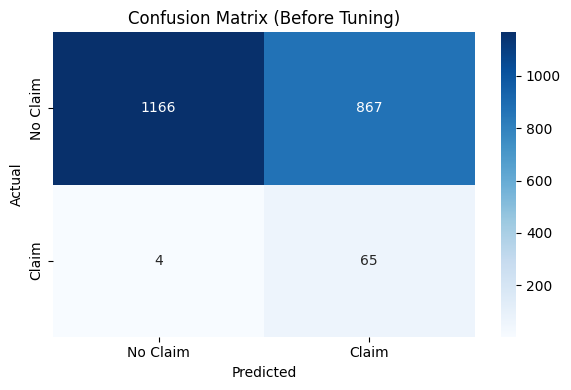


 Classification Report:
              precision    recall  f1-score   support

    No Claim       1.00      0.57      0.73      2033
       Claim       0.07      0.94      0.13        69

    accuracy                           0.59      2102
   macro avg       0.53      0.76      0.43      2102
weighted avg       0.97      0.59      0.71      2102


 ROC-AUC Score: 0.788


<Figure size 600x400 with 0 Axes>

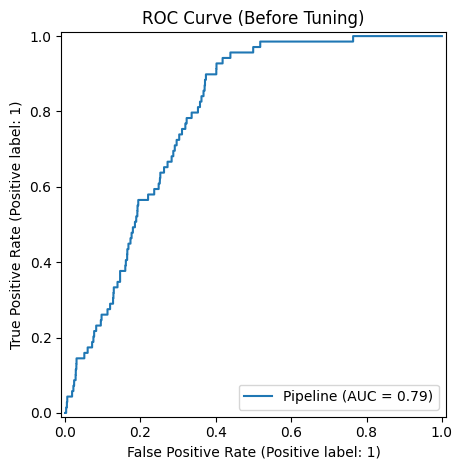

In [40]:
# Pipeline sebelum tuning
pipe_model = Pipeline([
    ("preprocessing", transformer),
    ("resampling", smote),
    ("modeling", logreg)
])

# Fitting ke data latih
pipe_model.fit(X_train, y_train)

# Prediksi terhadap data uji
y_pred_before = pipe_model.predict(X_test)
y_proba_before = pipe_model.predict_proba(X_test)[:, 1]  # Probabilitas untuk ROC AUC

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_before)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Claim', 'Claim'], yticklabels=['No Claim', 'Claim'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Before Tuning)')
plt.tight_layout()
plt.show()

# Classification Report
print("\n Classification Report:")
print(classification_report(y_test, y_pred_before, target_names=['No Claim', 'Claim']))

# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_proba_before)
print(f"\n ROC-AUC Score: {roc_auc:.3f}")

# Optional: ROC Curve Visualization
plt.figure(figsize=(6, 4))
RocCurveDisplay.from_estimator(pipe_model, X_test, y_test)
plt.title("ROC Curve (Before Tuning)")
plt.tight_layout()
plt.show()

#### **After Tuning**

In [41]:
# Hyperparameter tuning
hyperparam = {
    "modeling__C": np.logspace(-5, 5, 11),
    "modeling__solver": ["lbfgs", "liblinear", "sag", "saga"],
    "resampling": [smote]
}

# Pipeline
pipe_model = Pipeline([
    ("preprocessing", transformer),
    ("resampling", smote),
    ("modeling", logreg)
])

# GridSearchCV with KFold
grid_search = GridSearchCV( 
    estimator=pipe_model,
    param_grid=hyperparam,
    scoring='roc_auc',
    n_jobs=-1,
    cv=skfold
)

In [42]:
grid_search.fit(X_train, y_train)

c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('robust',
                                                                         RobustScaler(),
                                                                         ['Duration',
                                                                          'Net '
                                                                          'Sales',
                                                                          'Commision '
                                                                          '(in '
                                                                          'value)']),
                                                                        ('onehot',
                                                                         OneHotEncoder(drop='first',
                                                                                       sparse_output=False),
                                                                         ['Agency '
                                                                          'Type',
                                                                          'Distribution '
                                                                          'Channel']...
                                                                          'Product '
                                                                          'Name',
                                                                          'Destination'])])),
                                       ('resampling', SMOTE(random_state=0)),
                                       ('modeling',
                                        LogisticRegression(random_state=0))]),
             n_jobs=-1,
             param_grid={'modeling__C': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02,
       1.e+03, 1.e+04, 1.e+05]),
                         'modeling__solver': ['lbfgs', 'liblinear', 'sag',
                                              'saga'],
                         'resampling': [SMOTE(random_state=0)]},
             scoring='roc_auc')

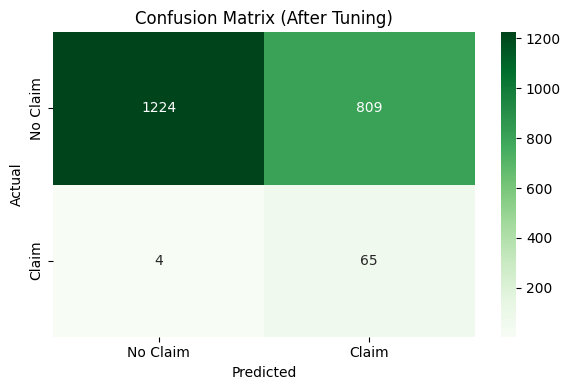


 Classification Report (After Tuning):
              precision    recall  f1-score   support

    No Claim       1.00      0.60      0.75      2033
       Claim       0.07      0.94      0.14        69

    accuracy                           0.61      2102
   macro avg       0.54      0.77      0.44      2102
weighted avg       0.97      0.61      0.73      2102


 ROC-AUC Score (After Tuning): 0.792


<Figure size 600x400 with 0 Axes>

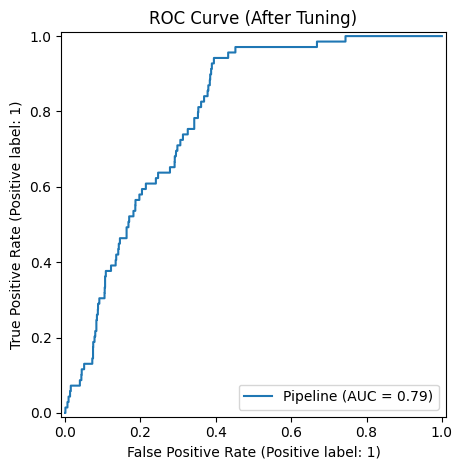

In [43]:
best_model = grid_search.best_estimator_

# Predict test set
y_pred_after = best_model.predict(X_test)
y_proba_after = best_model.predict_proba(X_test)[:, 1]

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_after)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['No Claim', 'Claim'], yticklabels=['No Claim', 'Claim'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (After Tuning)')
plt.tight_layout()
plt.show()

# Classification Report
print("\n Classification Report (After Tuning):")
print(classification_report(y_test, y_pred_after, target_names=['No Claim', 'Claim']))

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_proba_after)
print(f"\n ROC-AUC Score (After Tuning): {roc_auc:.3f}")

# ROC Curve
plt.figure(figsize=(6, 4))
RocCurveDisplay.from_estimator(best_model, X_test, y_test)
plt.title("ROC Curve (After Tuning)")
plt.tight_layout()
plt.show()

**Evaluasi Sebelum Tuning Confusion Matrix:**

- True Negative (No Claim → No Claim): 1166

- False Positive (No Claim → Claim): 867

- False Negative (Claim → No Claim): 4

- True Positive (Claim → Claim): 65

**Classification Report:**

- Precision kelas Claim: 0.07

- Recall kelas Claim: 0.94

- F1-score kelas Claim: 0.13

- Accuracy: 0.59

- ROC-AUC Score: 0.788

**Insight:**
Model sangat baik dalam mengenali klaim (recall 94%), tetapi precision-nya sangat rendah, artinya banyak prediksi klaim yang salah. Ini bisa menimbulkan banyak false positive.

**Evaluasi Setelah Tuning Confusion Matrix:**

- True Negative: 1224

- False Positive: 809

- False Negative: 4

- True Positive: 65

**Classification Report:**

- Precision kelas Claim: 0.07

- Recall kelas Claim: 0.94

- F1-score kelas Claim: 0.14

- Accuracy: 0.61

- ROC-AUC Score: 0.792

**Insight:**
Setelah tuning, model mengalami perbaikan kecil:

- Akurasi meningkat dari 0.59 → 0.61

- F1-score untuk klaim meningkat dari 0.13 → 0.14

- ROC-AUC naik dari 0.788 → 0.792

- Precision tetap rendah, tetapi model lebih baik dalam membedakan antara klaim dan non-klaim.

### **Feature Importance**

c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\AppData\Local\Temp\ipykernel_23408\2532577594.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


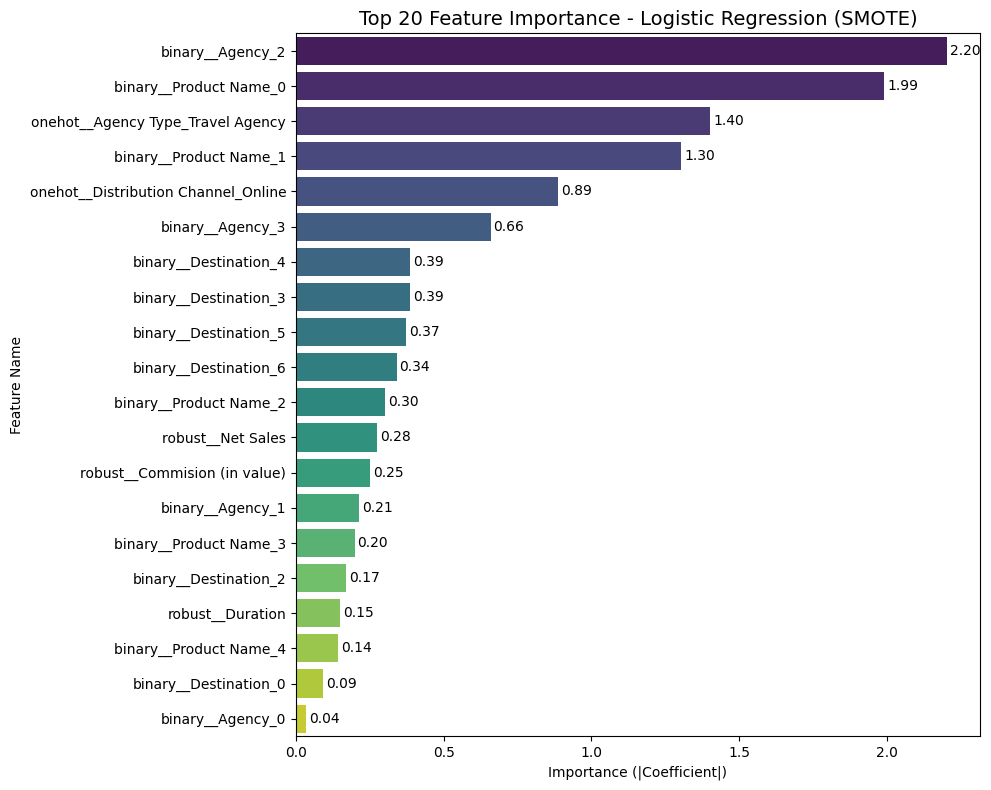

In [44]:
# Definisi pipeline
pipe_model = Pipeline([
    ("preprocessing", transformer),
    ("resampling", smote),
    ("modeling", logreg)
])

# Melatih model
pipe_model.fit(X_train, y_train)

# Mendapatkan nama fitur yang benar setelah preprocessing
# Jika transformer mengubah nama fitur
try:
    # Jika transformer memiliki atribut get_feature_names_out
    if hasattr(pipe_model.named_steps['preprocessing'], 'get_feature_names_out'):
        feature_names = pipe_model.named_steps['preprocessing'].get_feature_names_out()
    # Jika transformer memiliki atribut named_transformers_
    elif hasattr(pipe_model.named_steps['preprocessing'], 'named_transformers_'):
        feature_names = pipe_model.named_steps['preprocessing'].get_feature_names_out()
    else:
        # Gunakan nama kolom asli jika tidak ada transformasi nama
        feature_names = X_train.columns
except:
    # Fallback jika metode di atas tidak berhasil
    feature_names = [f'feature_{i}' for i in range(len(pipe_model.named_steps['modeling'].coef_[0]))]

# Pastikan jumlah feature names sama dengan jumlah koefisien
coef = pipe_model.named_steps['modeling'].coef_[0]
if len(feature_names) != len(coef):
    print(f"Warning: Length mismatch between feature names ({len(feature_names)}) and coefficients ({len(coef)})")
    feature_names = [f'feature_{i}' for i in range(len(coef))]

# Buat DataFrame importance
importances = pd.DataFrame({
    'Attribute': feature_names,
    'Importance': abs(coef)
})

# Mengurutkan fitur berdasarkan kepentingan (dari yang paling penting)
importances = importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(
    y='Attribute',
    x='Importance',
    data=importances.head(20),
    palette='viridis'
)

# Menambahkan label nilai importance di ujung bar
for index, value in enumerate(importances.head(20)['Importance']):
    plt.text(value + 0.01, index, f"{value:.2f}", va='center')

# Menambahkan judul dan label
plt.title('Top 20 Feature Importance - Logistic Regression (SMOTE)', fontsize=14)
plt.xlabel('Importance (|Coefficient|)')
plt.ylabel('Feature Name')
plt.tight_layout()
plt.show()

1. **Fitur paling berpengaruh:**

- binary__Agency_2 dan binary__Product Name_0 memiliki pengaruh paling besar terhadap prediksi klaim asuransi.

- Keduanya memiliki koefisien absolut tertinggi (>1.9), yang berarti perubahan pada fitur ini sangat memengaruhi probabilitas klaim.

2. **Kategori yang sangat berpengaruh:**

- Tipe agensi (Agency Type_Travel Agency) dan saluran distribusi online juga cukup signifikan, menunjukkan pentingnya channel penjualan dalam menentukan risiko klaim.

- Produk asuransi (Product Name_1 dan Product Name_2) juga masuk dalam top features, menandakan jenis produk sangat berpengaruh pada perilaku klaim.

3. **Variabel numerik:**

- Net Sales, Commision (in value), dan Duration memiliki pengaruh sedang. Meskipun tidak sebesar fitur kategorikal, mereka tetap memberikan informasi penting.

4. **Fitur dengan pengaruh rendah:**

- binary__Agency_0 dan binary__Destination_0 menunjukkan pengaruh kecil, yang bisa dipertimbangkan untuk feature reduction bila ingin menyederhanakan model.

In [45]:
print(classification_report(y_test,y_pred_after))

              precision    recall  f1-score   support

           0       1.00      0.60      0.75      2033
           1       0.07      0.94      0.14        69

    accuracy                           0.61      2102
   macro avg       0.54      0.77      0.44      2102
weighted avg       0.97      0.61      0.73      2102



**Model Evaluation Summary: Logistic Regression (Setelah Tuning) Confusion Matrix:**

- True Positive (TP) – Pelaku perjalanan yang mengajukan Claim dan benar diprediksi mengajukan: 65

- False Negative (FN) – Pelaku perjalanan yang mengajukan Claim tetapi diprediksi tidak mengajukan: 4

- True Negative (TN) – Pelaku perjalanan yang tidak mengajukan Claim dan benar diprediksi tidak mengajukan: 1217

- False Positive (FP) – Pelaku perjalanan yang tidak mengajukan Claim tetapi diprediksi mengajukan: 847

- Total pelaku perjalanan yang berhak menerima Claim: TP + FN = 69
- Total pelaku perjalanan yang tidak berhak menerima Claim: TN + FP = 2033

**Hasil Evaluasi:**
- Recall (Claim): 0.94 → 94% dari pelaku perjalanan yang berhak menerima Claim berhasil dikenali dengan baik oleh model.

- Precision (Claim): 0.07 → Hanya 7% dari prediksi "Claim" yang benar-benar akurat.

- F1-score (Claim): 0.14 → Masih tergolong rendah karena precision sangat rendah.

- Accuracy: 61% → Hanya 61% dari seluruh data yang berhasil diprediksi dengan benar oleh model.

- Macro Average F1-score: 0.44 → Rata-rata kemampuan model menangani kedua kelas masih terbatas.

- Weighted Average F1-score: 0.73 → Menunjukkan model cenderung berat sebelah ke kelas mayoritas (No Claim).


**Export Model**

In [46]:
pickle.dump(best_model, open('travel_insurance_best_model.sav', 'wb'))

## **4. Conclusion & Recommendation**

**Kesimpulan Berdasarkan Hasil Classification Report (Setelah Tuning):**
1.  Class 0 – Tidak Berhak untuk Klaim:
- Model menunjukkan performa yang sangat baik dalam mengidentifikasi pelanggan yang tidak berhak menerima klaim, dengan precision sempurna (1.00). Hal ini berarti seluruh prediksi terhadap kategori ini dapat dipercaya sepenuhnya.
Selain itu, recall sebesar 0.60 menunjukkan bahwa model mampu mengenali sebagian besar dari mereka yang memang tidak berhak, dengan ruang untuk peningkatan agar dapat menangkap lebih banyak kasus serupa. F1-score sebesar 0.75 menandakan keseimbangan yang cukup baik antara presisi dan sensitivitas.

2. Class 1 – Berhak untuk Klaim:
- Model memiliki recall tinggi sebesar 0.94, menandakan kemampuannya yang sangat kuat dalam mendeteksi hampir seluruh klaim yang benar-benar valid. Ini menjadi keunggulan tersendiri, khususnya dalam konteks layanan pelanggan dan keadilan pemberian klaim.
Meskipun nilai precision masih berada di angka 0.07, hal ini membuka peluang bagi pengembangan lanjutan untuk memperbaiki akurasi dalam memprediksi klaim yang benar-benar sah, misalnya melalui penyesuaian threshold atau metode penyeimbangan data.

**Recommendation**
1. Menambahkan kebijakan input data lebih lengkap dan bersih seperti dorong setiap agen atau channel input data untuk mengisi seluruh informasi penting seperti destination, product name, dan agency type secara lengkap.
2. Menambahkan fitur baru yang potensial meningkatkan prediksi seperti tambahkan informasi waktu (jika tersedia), misalnya musim perjalanan atau bulan pembelian polis.
3. Coba berbagai teknik penanganan data imbalance seperti kombinasi oversampling + undersampling bila perlu.
4. Rancang sistem feedback loop. Jadi setiap klaim yang diproses manual bisa diberi label valid/tidak, lalu dikembalikan ke model sebagai data retraining berikutnya (active learning) sehingga ini akan membuat model terus belajar dari kasus-kasus terbaru.
5. Mencoba dengan Algoritma dan teknik-teknik lainnya yang dapat membuat hasil lebih baik lagi.

